In [1]:
import numpy as np
import requests
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
headers = {"accept": "application/json", "GROCY-API-KEY": ""}
url = 'http://192.168.0.36:8040/api/objects/chores_log?query%5B%5D=chore_id%3D17'
chore_log = requests.get(url, headers=headers).json()

In [3]:
df = pd.DataFrame.from_dict(chore_log, orient='columns')

In [7]:
df = df[df['undone'] == 0]
df = df[df['skipped'] == 0]

In [11]:
df['cum_count'] = df.groupby('done_by_user_id').cumcount() + 1

In [16]:
df.tail()

,id,chore_id,tracked_time,done_by_user_id,row_created_timestamp,undone,undone_timestamp,skipped,cum_count
173,2145,17,2024-02-29 20:36:33,2,2024-02-29 19:36:33,0,None,0,88
174,2178,17,2024-03-07 08:23:01,3,2024-03-07 07:23:02,0,None,0,85
175,2190,17,2024-03-10 09:43:01,3,2024-03-10 08:43:01,0,None,0,86
176,2197,17,2024-03-10 21:33:22,3,2024-03-10 20:33:22,0,None,0,87
177,2198,17,2024-03-10 21:34:23,2,2024-03-10 20:34:23,0,None,0,89


<AxesSubplot:xlabel='tracked_time', ylabel='cum_count'>

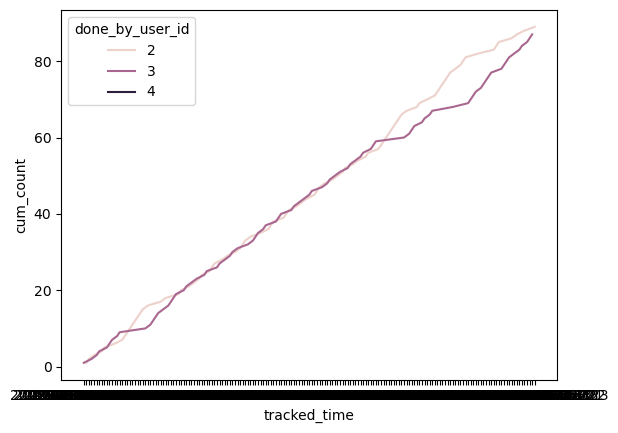

In [15]:
sns.lineplot(data=df, x="tracked_time", y="cum_count", hue="done_by_user_id")